In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as mse
from sklearn.model_selection import cross_val_score
import pickle

In [83]:
df = pd.read_csv("/content/house_details.csv")
df

,Price,Area,Bedrooms,Bathrooms,Location,Builder,Status
0,25 L,728,2.0,2 Bathrooms,Avadi,NaN,Ready to move
1,26 L,739,2.0,1 Bathrooms,Avadi,NaN,Ready to move
2,60 L,1150,3.0,3 Bathrooms,Avadi,NaN,Ready to move
3,48 L,931,2.0,2 Bathrooms,Avadi,NaN,Ready to move
4,20 L,317,1.0,1 Bathrooms,Avadi,NaN,Ready to move
...,...,...,...,...,...,...,...
5124,52.67 L,878,2.0,2 Bathrooms,Mugalivakkam,Lifestyle Le Paradise,Under Construction
5125,51.64 L,906,2.0,NaN,Mugalivakkam,Stellar Blue Tide,Under Construction
5126,75.7 L,1037,2.0,2 Bathrooms,Mugalivakkam,NaN,Under Construction
5127,70.24 L,1171,3.0,NaN,Mugalivakkam,Lifestyle Le Paradise,Under Construction


In [84]:
df.head(5)

,Price,Area,Bedrooms,Bathrooms,Location,Builder,Status
0,25 L,728,2.0,2 Bathrooms,Avadi,NaN,Ready to move
1,26 L,739,2.0,1 Bathrooms,Avadi,NaN,Ready to move
2,60 L,1150,3.0,3 Bathrooms,Avadi,NaN,Ready to move
3,48 L,931,2.0,2 Bathrooms,Avadi,NaN,Ready to move
4,20 L,317,1.0,1 Bathrooms,Avadi,NaN,Ready to move


In [85]:
df.isnull().sum()

Price           0
Area            0
Bedrooms      204
Bathrooms    1377
Location        0
Builder      2032
Status          0
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5129 entries, 0 to 5128
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      5129 non-null   object 
 1   Area       5129 non-null   int64  
 2   Bedrooms   4925 non-null   float64
 3   Bathrooms  3752 non-null   object 
 4   Location   5129 non-null   object 
 5   Builder    3097 non-null   object 
 6   Status     5129 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 280.6+ KB


#Preprocessing

In [87]:
df.isnull().sum()

Price           0
Area            0
Bedrooms      204
Bathrooms    1377
Location        0
Builder      2032
Status          0
dtype: int64

In [88]:
df1 = df.dropna(subset = ["Bedrooms"])
df1 = df1.reset_index(drop = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4925 entries, 0 to 4924
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      4925 non-null   object 
 1   Area       4925 non-null   int64  
 2   Bedrooms   4925 non-null   float64
 3   Bathrooms  3752 non-null   object 
 4   Location   4925 non-null   object 
 5   Builder    3057 non-null   object 
 6   Status     4925 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 269.5+ KB


In [89]:
df1["Price"]

0          25 L
1          26 L
2          60 L
3          48 L
4          20 L
         ...   
4920    52.67 L
4921    51.64 L
4922     75.7 L
4923    70.24 L
4924    70.24 L
Name: Price, Length: 4925, dtype: object

In [90]:
# converting the price to float and converting Crore to Lakh

for i in range(len(df1["Price"])):
  
    a = df1["Price"][i].split(" ")
    if a[1] == "Cr":
      
      b = float(a[0])*100
      df1["Price"][i] = b
    else:
      df1["Price"][i] = float(a[0])

df1["Price"]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0        25.0
1        26.0
2        60.0
3        48.0
4        20.0
        ...  
4920    52.67
4921    51.64
4922     75.7
4923    70.24
4924    70.24
Name: Price, Length: 4925, dtype: object

In [91]:
df1["Price"] = df1["Price"].astype("float64")

In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4925 entries, 0 to 4924
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      4925 non-null   float64
 1   Area       4925 non-null   int64  
 2   Bedrooms   4925 non-null   float64
 3   Bathrooms  3752 non-null   object 
 4   Location   4925 non-null   object 
 5   Builder    3057 non-null   object 
 6   Status     4925 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 269.5+ KB


In [93]:
#df.dropna(axis = 0)

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4925 entries, 0 to 4924
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      4925 non-null   float64
 1   Area       4925 non-null   int64  
 2   Bedrooms   4925 non-null   float64
 3   Bathrooms  3752 non-null   object 
 4   Location   4925 non-null   object 
 5   Builder    3057 non-null   object 
 6   Status     4925 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 269.5+ KB


In [95]:
df1["Bathrooms"].fillna(0,inplace = True)

In [96]:
df1["Bathrooms"] = df1["Bathrooms"].apply(lambda x:x.strip("Bathrooms") if x == str(x) else x)
df1["Bathrooms"] = df1["Bathrooms"].astype("int64")

In [97]:
#df["Bathrooms"].replace(to_replace = 0,value = round(df.Bathrooms.mean()))

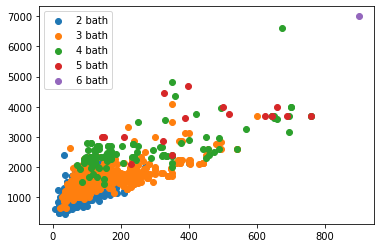

In [98]:
def scatter_plot(df):
  bath2 = df[ (df.Bathrooms == 2)]
  bath3 = df[ (df.Bathrooms == 3)]
  bath4 = df[ (df.Bathrooms == 4)]
  bath5 = df[ (df.Bathrooms == 5)]
  bath6 = df[ (df.Bathrooms == 6)]


  plt.scatter(bath2.Price,bath2.Area,label = "2 bath")
  plt.scatter(bath3.Price,bath3.Area,label = "3 bath")
  plt.scatter(bath4.Price,bath4.Area,label = "4 bath")
  plt.scatter(bath5.Price,bath5.Area,label = "5 bath")
  plt.scatter(bath6.Price,bath6.Area,label = "6 bath")

  plt.legend()

scatter_plot(df1)

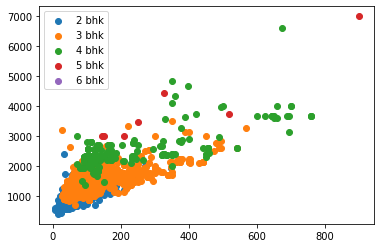

In [99]:
def scatter_plot(df):
  bed2 = df[ (df.Bedrooms == 2)]
  bed3 = df[ (df.Bedrooms == 3)]
  bed4 = df[ (df.Bedrooms == 4)]
  bed5 = df[ (df.Bedrooms == 5)]
  bed6 = df[ (df.Bedrooms == 6)]


  plt.scatter(bed2.Price,bed2.Area,label = "2 bhk")
  plt.scatter(bed3.Price,bed3.Area,label = "3 bhk")
  plt.scatter(bed4.Price,bed4.Area,label = "4 bhk")
  plt.scatter(bed5.Price,bed5.Area,label = "5 bhk")
  plt.scatter(bed6.Price,bed6.Area,label = "6 bhk")

  plt.legend()

scatter_plot(df1)

In [100]:
df1["Bathrooms"].replace(to_replace = 0,value = np.nan)

0       2.0
1       1.0
2       3.0
3       2.0
4       1.0
       ... 
4920    2.0
4921    NaN
4922    2.0
4923    NaN
4924    NaN
Name: Bathrooms, Length: 4925, dtype: float64

In [101]:
df1["Bathrooms"][4923]

0

In [102]:
for i in range(len(df1["Bathrooms"])):
  
    if df1["Bathrooms"][i] == 0:
      if df1["Area"][i] < 600 and df1["Bedrooms"][i] <= 2:
        df1["Bathrooms"][i] = 2
      elif (df1["Area"][i] >= 600 and df1["Area"][i] <= 2000) and df1["Bedrooms"][i] <= 3:
        df1["Bathrooms"][i] = 3
      elif (df1["Area"][i] >= 2000 and df1["Area"][i] <= 2500) and df1["Bedrooms"][i] <= 4:
        df1["Bathrooms"][i] = 4
      else:
        df1["Bathrooms"][i] = df1["Bedrooms"][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: Se

In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4925 entries, 0 to 4924
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      4925 non-null   float64
 1   Area       4925 non-null   int64  
 2   Bedrooms   4925 non-null   float64
 3   Bathrooms  4925 non-null   int64  
 4   Location   4925 non-null   object 
 5   Builder    3057 non-null   object 
 6   Status     4925 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 269.5+ KB


In [104]:
df1["Builder"].fillna("Independent house",inplace = True)

In [105]:
type((df1["Bathrooms"][5]))

numpy.int64

In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4925 entries, 0 to 4924
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      4925 non-null   float64
 1   Area       4925 non-null   int64  
 2   Bedrooms   4925 non-null   float64
 3   Bathrooms  4925 non-null   int64  
 4   Location   4925 non-null   object 
 5   Builder    4925 non-null   object 
 6   Status     4925 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 269.5+ KB


In [107]:
cols = ["Bedrooms","Bathrooms","Location","Builder","Status"]

for i in cols:
  print("{} : {}".format(i,len(df1[i].unique())))
  print("{}".format(df1[i].value_counts()))
  print()

Bedrooms : 6
2.0     2635
3.0     1693
1.0      399
4.0      189
5.0        7
10.0       2
Name: Bedrooms, dtype: int64

Bathrooms : 8
2    2280
3    2034
1     413
4     178
5      16
9       2
7       1
6       1
Name: Bathrooms, dtype: int64

Location : 62
Avadi              100
Siruseri           100
Chromepet          100
Navallur           100
Pallikaranai       100
                  ... 
Ayapakkam           12
Neelankarai         11
Nemilicheri          7
Rathinamangalam      5
Kandhan Kollai       1
Name: Location, Length: 62, dtype: int64

Builder : 626
Independent house                                  1868
Akshaya Today                                        74
Akshaya Republic                                     72
Adroit Prosper                                       52
Tata Tata New Value Homes New Haven Ribbon Walk      51
                                                   ... 
 Ajuba Nakshatra                                      1
VG Madambakkam Flats                   

In [108]:
builder_stat = df1.groupby('Builder')["Builder"].agg("count").sort_values(ascending = False)
builder_stat

Builder
Independent house                                  1868
Akshaya Today                                        74
Akshaya Republic                                     72
Adroit Prosper                                       52
Tata Tata New Value Homes New Haven Ribbon Walk      51
                                                   ... 
Luxe Sreshta Aibea Nagar                              1
Lucky Builders Olives Garden                          1
Logesh Sivaposanam Castle                             1
Land Sapphire                                         1
Yadhav Sri Pooja Nivas                                1
Name: Builder, Length: 626, dtype: int64

In [109]:
builder_less_20 = builder_stat[builder_stat < 20]
builder_less_20

Builder
Urbanrise Jubliee Residences         19
Golden Opulence                      19
TVS Emerald Atrium At Green Acres    19
Puravankara Windermere               19
Arun Excello Sindhuraa               19
                                     ..
Luxe Sreshta Aibea Nagar              1
Lucky Builders Olives Garden          1
Logesh Sivaposanam Castle             1
Land Sapphire                         1
Yadhav Sri Pooja Nivas                1
Name: Builder, Length: 593, dtype: int64

In [110]:
builder_less_20.shape

(593,)

In [111]:
df1["Builder"] = df1["Builder"].apply(lambda x: "other" if  x in  builder_less_20 else x)
df1["Builder"]

0           Independent house
1           Independent house
2           Independent house
3           Independent house
4           Independent house
                ...          
4920    Lifestyle Le Paradise
4921                    other
4922        Independent house
4923    Lifestyle Le Paradise
4924    Lifestyle Le Paradise
Name: Builder, Length: 4925, dtype: object

In [112]:
len(df1["Builder"].unique())

34

In [113]:
df1["Builder"].unique()

array(['Independent house', 'other', 'Mahindra Happinest',
       'Shriram Park 63', 'Urban Amaze', 'Akshaya Orlando A1 To A6',
       'LML Prakriti Phase II', 'Risland The Ace',
       'Alliance Galleria Residences', 'Casa Grand Casagrand First City',
       'DRA Centralia', 'Arun Excello Urmika', 'Mahindra Aqualily ',
       'Urbanrise Code Name Independence Day',
       'TVS Magnific At TVS Emerald Peninsula', 'Casa Grand Utopia',
       'Akshaya Today', 'Radiance Suprema', 'Lifestyle The Podium',
       'Tata Tata New Value Homes New Haven Ribbon Walk', 'DAC Agaram',
       'Urbanrise Code Name New Porur', 'Vijay Raja VRX 360',
       'Akshaya Tango', 'Reputed Builder Apartment', 'Samprathy Aura',
       'Shriram Code Name Mangalam', 'Altis Ashraya', 'DAC Centum',
       'Akshaya Republic', 'GKS Tulive Bellevue',
       'Hiranandani Parks Apartment', 'Adroit Prosper',
       'Lifestyle Le Paradise'], dtype=object)

In [114]:
df1["Location"].replace(to_replace = "tambaram west",value = "West Tambaram",inplace = True)

In [115]:
location_stat = df1.groupby('Location')["Location"].agg("count").sort_values(ascending = False)
location_stat

Location
West Tambaram      200
Mugalivakkam       100
Padur              100
Pallavaram         100
Pallikaranai       100
                  ... 
Ayapakkam           12
Neelankarai         11
Nemilicheri          7
Rathinamangalam      5
Kandhan Kollai       1
Name: Location, Length: 61, dtype: int64

In [116]:
location_less_70  = location_stat[location_stat  < 70]
len(location_less_70)

15

In [117]:
location_less_70

Location
Veppampattu         59
Kundrathur          53
Maraimalai Nagar    39
Agaramthen          38
Chengalpattu        27
Thirunindravur      22
Kandigai            17
Sriperumbudur       14
Vandalur            14
Tiruvallur          13
Ayapakkam           12
Neelankarai         11
Nemilicheri          7
Rathinamangalam      5
Kandhan Kollai       1
Name: Location, dtype: int64

In [118]:
df1["Location"] = df1["Location"].apply(lambda x:"other" if x in location_less_70 else x)
len(df1["Location"].unique())

47

In [119]:
df1["Location"].value_counts()

other                332
West Tambaram        200
Avadi                100
Thiruvanmiyur        100
Padur                100
Madambakkam          100
Manapakkam           100
Thaiyur              100
Pammal               100
Kovilambakkam        100
Madhavaram           100
T Nagar              100
Thirumazhisai        100
Sholinganallur       100
Thoraipakkam OMR     100
Choolaimedu          100
Mangadu              100
Kovur                100
Adyar                100
Valasaravakkam       100
Thalambur            100
Singaperumal Koil    100
Pallikaranai         100
Navallur             100
Selaiyur             100
Guduvancheri         100
Perungalathur        100
Medavakkam           100
Poonamallee          100
Mogappair            100
Kelambakkam          100
Chromepet            100
Urapakkam            100
Madipakkam           100
Kolathur             100
Ambattur             100
Perungudi            100
Pallavaram           100
Velachery            100
Siruseri             100


In [120]:
df1["Location"].unique()

array(['Avadi', 'Sholinganallur', 'Guduvancheri', 'West Tambaram',
       'Perungalathur', 'Medavakkam', 'Porur', 'other', 'Poonamallee',
       'Mogappair', 'Kelambakkam', 'Urapakkam', 'Selaiyur', 'Madipakkam',
       'Kolathur', 'Ambattur', 'Perungudi', 'Pallavaram', 'Velachery',
       'Siruseri', 'Perumbakkam', 'Chromepet', 'Navallur', 'Pallikaranai',
       'Singaperumal Koil', 'Padur', 'Madambakkam', 'Manapakkam',
       'Thaiyur', 'Pammal', 'Kovilambakkam', 'Madhavaram', 'T Nagar',
       'Thiruvanmiyur', 'Moolacheri', 'Thirumazhisai', 'Thoraipakkam OMR',
       'Choolaimedu', 'Thirumullaivoyal', 'Mangadu', 'East Tambaram',
       'Kovur', 'Adyar', 'Valasaravakkam', 'Oragadam', 'Thalambur',
       'Mugalivakkam'], dtype=object)

In [121]:
le = LabelEncoder()
df1["Status"] = le.fit_transform(df1["Status"])
df1["Status"]

0       0
1       0
2       0
3       0
4       0
       ..
4920    1
4921    1
4922    1
4923    1
4924    1
Name: Status, Length: 4925, dtype: int64

In [122]:
dummies1 = pd.get_dummies(df1.Builder)
dummies1

,Adroit Prosper,Akshaya Orlando A1 To A6,Akshaya Republic,Akshaya Tango,Akshaya Today,Alliance Galleria Residences,Altis Ashraya,Arun Excello Urmika,Casa Grand Casagrand First City,Casa Grand Utopia,...,Samprathy Aura,Shriram Code Name Mangalam,Shriram Park 63,TVS Magnific At TVS Emerald Peninsula,Tata Tata New Value Homes New Haven Ribbon Walk,Urban Amaze,Urbanrise Code Name Independence Day,Urbanrise Code Name New Porur,Vijay Raja VRX 360,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
df2 = pd.concat([df1,dummies1.drop('other',axis = "columns")],axis = "columns")
df2

,Price,Area,Bedrooms,Bathrooms,Location,Builder,Status,Adroit Prosper,Akshaya Orlando A1 To A6,Akshaya Republic,...,Risland The Ace,Samprathy Aura,Shriram Code Name Mangalam,Shriram Park 63,TVS Magnific At TVS Emerald Peninsula,Tata Tata New Value Homes New Haven Ribbon Walk,Urban Amaze,Urbanrise Code Name Independence Day,Urbanrise Code Name New Porur,Vijay Raja VRX 360
0,25.00,728,2.0,2,Avadi,Independent house,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26.00,739,2.0,1,Avadi,Independent house,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60.00,1150,3.0,3,Avadi,Independent house,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,48.00,931,2.0,2,Avadi,Independent house,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20.00,317,1.0,1,Avadi,Independent house,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,52.67,878,2.0,2,Mugalivakkam,Lifestyle Le Paradise,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4921,51.64,906,2.0,3,Mugalivakkam,other,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4922,75.70,1037,2.0,2,Mugalivakkam,Independent house,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4923,70.24,1171,3.0,3,Mugalivakkam,Lifestyle Le Paradise,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
df2.shape

(4925, 40)

In [125]:
df3 = df2.drop('Builder',axis = "columns")
df3

,Price,Area,Bedrooms,Bathrooms,Location,Status,Adroit Prosper,Akshaya Orlando A1 To A6,Akshaya Republic,Akshaya Tango,...,Risland The Ace,Samprathy Aura,Shriram Code Name Mangalam,Shriram Park 63,TVS Magnific At TVS Emerald Peninsula,Tata Tata New Value Homes New Haven Ribbon Walk,Urban Amaze,Urbanrise Code Name Independence Day,Urbanrise Code Name New Porur,Vijay Raja VRX 360
0,25.00,728,2.0,2,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26.00,739,2.0,1,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60.00,1150,3.0,3,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,48.00,931,2.0,2,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20.00,317,1.0,1,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,52.67,878,2.0,2,Mugalivakkam,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4921,51.64,906,2.0,3,Mugalivakkam,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4922,75.70,1037,2.0,2,Mugalivakkam,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4923,70.24,1171,3.0,3,Mugalivakkam,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
dummies2 = pd.get_dummies(df1.Location)
dummies2

,Adyar,Ambattur,Avadi,Choolaimedu,Chromepet,East Tambaram,Guduvancheri,Kelambakkam,Kolathur,Kovilambakkam,...,Thalambur,Thirumazhisai,Thirumullaivoyal,Thiruvanmiyur,Thoraipakkam OMR,Urapakkam,Valasaravakkam,Velachery,West Tambaram,other
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
df4 = pd.concat([df3,dummies2.drop('other',axis = "columns")],axis = "columns")
df4

,Price,Area,Bedrooms,Bathrooms,Location,Status,Adroit Prosper,Akshaya Orlando A1 To A6,Akshaya Republic,Akshaya Tango,...,Thaiyur,Thalambur,Thirumazhisai,Thirumullaivoyal,Thiruvanmiyur,Thoraipakkam OMR,Urapakkam,Valasaravakkam,Velachery,West Tambaram
0,25.00,728,2.0,2,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26.00,739,2.0,1,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60.00,1150,3.0,3,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,48.00,931,2.0,2,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20.00,317,1.0,1,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,52.67,878,2.0,2,Mugalivakkam,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4921,51.64,906,2.0,3,Mugalivakkam,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4922,75.70,1037,2.0,2,Mugalivakkam,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4923,70.24,1171,3.0,3,Mugalivakkam,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
df5 = df4.drop("Location",axis = 1)
df5

,Price,Area,Bedrooms,Bathrooms,Status,Adroit Prosper,Akshaya Orlando A1 To A6,Akshaya Republic,Akshaya Tango,Akshaya Today,...,Thaiyur,Thalambur,Thirumazhisai,Thirumullaivoyal,Thiruvanmiyur,Thoraipakkam OMR,Urapakkam,Valasaravakkam,Velachery,West Tambaram
0,25.00,728,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26.00,739,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60.00,1150,3.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,48.00,931,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20.00,317,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,52.67,878,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4921,51.64,906,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4922,75.70,1037,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4923,70.24,1171,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4925 entries, 0 to 4924
Data columns (total 84 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Price                                            4925 non-null   float64
 1   Area                                             4925 non-null   int64  
 2   Bedrooms                                         4925 non-null   float64
 3   Bathrooms                                        4925 non-null   int64  
 4   Status                                           4925 non-null   int64  
 5   Adroit Prosper                                   4925 non-null   uint8  
 6   Akshaya Orlando A1 To A6                         4925 non-null   uint8  
 7   Akshaya Republic                                 4925 non-null   uint8  
 8   Akshaya Tango                                    4925 non-null   uint8  
 9   Akshaya Today                 

In [130]:
x = df5.drop('Price',axis = 1)
y = df5['Price']

In [131]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size = 0.2)

#Model building

In [132]:
def pred_result(model):
  y_pred = model.predict(x_test)
  mse_ = mse(y_pred,y_test)
  r2 = r2_score(y_pred,y_test)
  return y_pred,mse_,r2

In [133]:
def display(r2,mse_):
  print("Accuracy : {:.2f}%".format(r2*100))
  print("MSE : {:.6f}".format(mse_))

In [134]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)
x_train

array([[0.15908574, 0.22222222, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.10438936, 0.11111111, 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [0.10666363, 0.22222222, 0.125     , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.09597453, 0.22222222, 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [0.08323857, 0.11111111, 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [0.11030248, 0.11111111, 0.125     , ..., 0.        , 0.        ,
        0.        ]])

In [135]:
x_train.shape

(3940, 83)

In [136]:
def cross_score(model,n):
  acc = cross_val_score(estimator = model,X = x_train,y = y_train,cv = n)
  #print(acc)
  print("Accuracy : {:.2f}%".format(acc.mean()*100))
  print("SD : {:.2f}%".format(acc.std()*100))

In [137]:
x.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Status', 'Adroit Prosper',
       'Akshaya Orlando A1 To A6', 'Akshaya Republic', 'Akshaya Tango',
       'Akshaya Today', 'Alliance Galleria Residences', 'Altis Ashraya',
       'Arun Excello Urmika', 'Casa Grand Casagrand First City',
       'Casa Grand Utopia', 'DAC Agaram', 'DAC Centum', 'DRA Centralia',
       'GKS Tulive Bellevue', 'Hiranandani Parks Apartment',
       'Independent house', 'LML Prakriti Phase II', 'Lifestyle Le Paradise',
       'Lifestyle The Podium', 'Mahindra Aqualily ', 'Mahindra Happinest',
       'Radiance Suprema', 'Reputed Builder Apartment', 'Risland The Ace',
       'Samprathy Aura', 'Shriram Code Name Mangalam', 'Shriram Park 63',
       'TVS Magnific At TVS Emerald Peninsula',
       'Tata Tata New Value Homes New Haven Ribbon Walk', 'Urban Amaze',
       'Urbanrise Code Name Independence Day', 'Urbanrise Code Name New Porur',
       'Vijay Raja VRX 360', 'Adyar', 'Ambattur', 'Avadi', 'Choolaimedu',
       'Chr

In [174]:
np.where(x.columns == 'Bedrooms')[0][0]


1

In [139]:
x.columns == "Bedrooms"

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [140]:
np.zeros(len(x.columns))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [141]:
len(x.columns)


83

In [180]:
a = x.columns == "Independent house"
a.any()

True

In [205]:
def price_predict(location,area,bed,bath,status,builder):
  loc = x.columns == location
  bu = x.columns == builder
  
  if loc.any():
    location_index = np.where(x.columns == location)[0][0]
  else:
    location_index = 0

  if bu.any():   
    builder_index = np.where(x.columns == builder)[0][0]
  else:
    builder_index = 0

  y_pred = np.zeros(len(x.columns))
  y_pred[0] = area
  y_pred[1] = bed
  y_pred[2] = bath
  y_pred[3] = status
  if location_index > 0:
    y_pred[location_index] = 1
  if builder_index > 0:
    y_pred[builder_index] = 1

  

  return lin_model.predict(scale.transform([y_pred]))[0],y_pred



In [217]:
rand_score,a= price_predict("Avadi",1200,3,3,status = 0,builder = 'Independent house')
print(rand_score)

54.664662178753446


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [218]:
print(a)

[1.2e+03 3.0e+00 3.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00]


In [144]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)
cross_score(lin_model,10)

Accuracy : 85.66%
SD : 4.08%


In [145]:
lin_model.coef_

array([ 8.53297665e+02, -1.12407482e+02,  1.47321614e+01,  9.93466969e+00,
       -7.78542393e+00, -1.00504219e+00, -4.71117369e-01,  4.03943735e+01,
        9.07153571e-01,  3.03239448e+01,  8.81688304e+00,  5.72507401e+00,
       -2.12558597e+01, -3.10066900e+01, -9.83128233e+00,  4.33980200e+00,
       -1.59826192e+01, -2.58268098e+00, -4.50458901e+01, -8.04699487e-01,
       -1.76227502e+01, -5.75757084e+00,  1.68192980e+02, -3.30726451e+01,
        9.67621360e+00, -5.32405168e+00,  1.86820965e+00, -3.09657906e+01,
       -1.60360491e+01, -1.03785166e-01, -2.67315544e+00, -6.46498114e-01,
        1.56122676e+01,  1.22064974e+01,  2.22096111e+01, -1.06419800e+01,
        1.06572413e+01,  1.52289174e+02,  1.56256048e+01,  4.35368399e+00,
        5.94797033e+01,  1.43684174e+01,  1.87714786e+01,  7.86360021e+00,
       -3.10058857e+00,  1.56500144e+01,  1.28338698e+01,  1.26919871e+01,
        9.64065607e+00,  7.19344149e+00,  2.17759746e+01,  2.00253766e+01,
        9.92787992e+00,  

In [146]:
coeff_df = pd.DataFrame(lin_model.coef_,x.columns,columns=["Coefficient"])
coeff_df

,Coefficient
Area,853.297665
Bedrooms,-112.407482
Bathrooms,14.732161
Status,9.934670
Adroit Prosper,-7.785424
...,...
Thoraipakkam OMR,25.027807
Urapakkam,0.977456
Valasaravakkam,39.960128
Velachery,48.179284


In [147]:
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train,y_train)
cross_score(tree_model,10)

Accuracy : 85.92%
SD : 7.71%


In [ ]:
#y_pred,mse_,r2 = pred_result(tree_model)

In [ ]:
#tree_model.score(x_test,y_test)

In [ ]:
#display(r2,mse_)

In [148]:
svm_model = SVR(kernel = "rbf")
svm_model.fit(x_train,y_train)
cross_score(svm_model,10)

Accuracy : 20.72%
SD : 4.58%


In [ ]:
#y_pred,mse_,r2 = pred_result(svm_model)

In [ ]:
#svm_model.score(x_test,y_test)

In [ ]:
#display(r2,mse_)

In [149]:
rand_forest = RandomForestRegressor(n_estimators = 11)
rand_forest.fit(x_train,y_train)
cross_score(rand_forest,10)

Accuracy : 87.31%
SD : 7.72%


In [ ]:
#y_pred,mse_,r2 = pred_result(rand_forest)

In [ ]:
#rand_forest.score(x_test,y_test)

In [ ]:
_#display(r2,mse_)

In [150]:
df5[0:1]

,Price,Area,Bedrooms,Bathrooms,Status,Adroit Prosper,Akshaya Orlando A1 To A6,Akshaya Republic,Akshaya Tango,Akshaya Today,...,Thaiyur,Thalambur,Thirumazhisai,Thirumullaivoyal,Thiruvanmiyur,Thoraipakkam OMR,Urapakkam,Valasaravakkam,Velachery,West Tambaram
0,25.0,728,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
rand_score,lin_score= price_predict("Avadi",4000,5,6,status = 0,builder = "Independent house")
print(rand_score,lin_score)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [154]:
rand_pred = rand_forest.predict(x_test)

In [155]:
df6 = pd.DataFrame({"Actual Values":y_test,"Predicted values":rand_pred})

In [156]:
df6 = df6.sort_index(axis = 0)

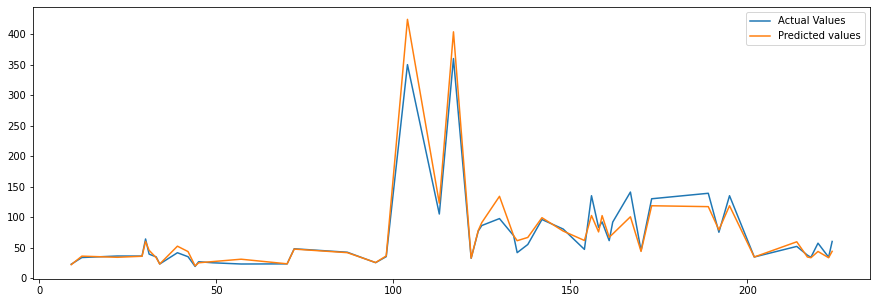

In [157]:
df6.head(50).plot(figsize = (15,5))

In [158]:
lin_pred = lin_model.predict(x_test)

In [159]:
df7 = pd.DataFrame({"Actual values":y_test,"Predicted values":lin_pred})

In [160]:
df7 = df7.sort_index(axis = 0)

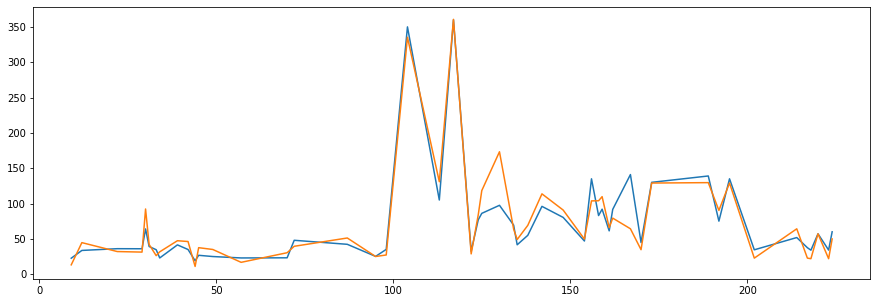

In [161]:
plt.figure(figsize = (15,5))
plt.plot(df7["Actual values"].head(50))
plt.plot(df7["Predicted values"].head(50))


In [162]:
avg_pred = (rand_pred + lin_pred)/2
df8 = pd.DataFrame({"Actual values":y_test,"Predicted values":avg_pred})

In [163]:
df8 = df8.sort_index(axis = 0)

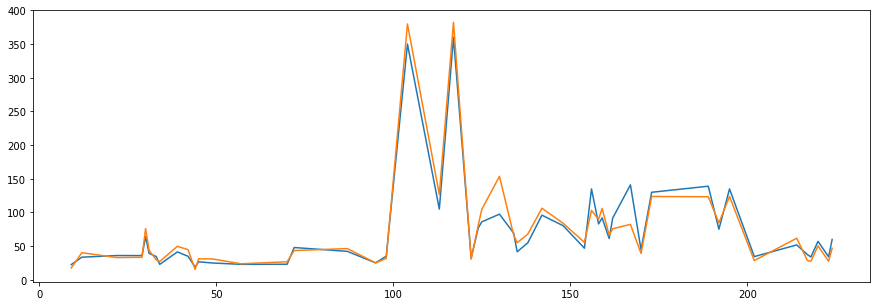

In [164]:
plt.figure(figsize = (15,5))
plt.plot(df8["Actual values"].head(50))
plt.plot(df8["Predicted values"].head(50))

In [ ]:
with open("model.pkl","wb") as file:
   pickle.dump(lin_model,file)

In [ ]:
with open("scaler.pkl","wb") as file:
   pickle.dump(scale,file)